In [ ]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import time

# Load and prepare training data
exp_data_tr = pd.read_csv('DC_Motor_experimental_data_training.csv')
exp_data_tr.columns = ['time', 'voltage', 'speed']

# Extract features and target variables
t_tr = np.array(exp_data_tr["time"])
v_tr = np.array(exp_data_tr["voltage"])
theta_tr = np.array(exp_data_tr["speed"])

# Stack the input features: voltage (v) and time (t)
X_tr = np.column_stack((v_tr, t_tr))

# Polynomial feature transformation to mimic the behavior of symbolic regression
poly = PolynomialFeatures(degree=3, include_bias=False)
X_tr_poly = poly.fit_transform(X_tr)

# Initialize the models
models = {
    "OLS (Linear Regression)": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, max_iter=200),
    "Ridge": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

# Dictionary to store predictions and metrics
predictions = {}
metrics = {}

# Train each model and store predictions and metrics
for name, model in models.items():
    # Start timer
    t0 = time()

    # Train the model
    model.fit(X_tr_poly, theta_tr)

    # Print computation time
    print(f'{name} Computation time: {time() - t0} seconds')

    # Store coefficients and intercept if available
    intercept = getattr(model, 'intercept_', None)
    coefficients = getattr(model, 'coef_', None)
    features = poly.get_feature_names_out()

    if intercept is not None and coefficients is not None:
        # Create model equation
        equation = f"{intercept:.4f}"
        for feature, coef in zip(features, coefficients):
            equation += f" + ({coef:.4f})*{feature}"
        print(f"\n{name} Model (Equation): theta = {equation}\n")
    else:
        print(f"\n{name} does not provide a simple linear equation.\n")

    # Predict on the training data (to store metrics)
    predictions[name] = model.predict(X_tr_poly)

    # Calculate evaluation metrics
    mse = mean_squared_error(theta_tr, predictions[name])
    mae = mean_absolute_error(theta_tr, predictions[name])
    r2 = r2_score(theta_tr, predictions[name])

    # Store metrics
    metrics[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

OLS (Linear Regression) Computation time: 0.010701656341552734 seconds

OLS (Linear Regression) Model (Equation): theta = -48.3658 + (3.5334)*x0 + (0.5656)*x1 + (0.0040)*x0^2 + (-0.0216)*x0 x1 + (0.0040)*x1^2 + (-0.0003)*x0^3 + (0.0005)*x0^2 x1 + (-0.0002)*x0 x1^2 + (0.0000)*x1^3



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+06, tolerance: 1.123e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.66617e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso Computation time: 0.5151722431182861 seconds

Lasso Model (Equation): theta = 26.3288 + (1.9279)*x0 + (0.3596)*x1 + (-0.0065)*x0^2 + (-0.0001)*x0 x1 + (-0.0002)*x1^2 + (0.0000)*x0^3 + (-0.0000)*x0^2 x1 + (-0.0000)*x0 x1^2 + (-0.0000)*x1^3

Ridge Computation time: 0.029163599014282227 seconds

Ridge Model (Equation): theta = -48.3575 + (3.5325)*x0 + (0.5660)*x1 + (0.0041)*x0^2 + (-0.0216)*x0 x1 + (0.0040)*x1^2 + (-0.0003)*x0^3 + (0.0005)*x0^2 x1 + (-0.0002)*x0 x1^2 + (0.0000)*x1^3

Decision Tree Computation time: 0.8982515335083008 seconds

Decision Tree does not provide a simple linear equation.

Random Forest Computation time: 26.730931997299194 seconds

Random Forest does not provide a simple linear equation.

SVR Computation time: 44.17930841445923 seconds

SVR does not provide a simple linear equation.

K-Nearest Neighbors Computation time: 0.02817988395690918 seconds

K-Nearest Neighbors does not provide a simple linear equation.

Gradient Boosting Computation time: 10.81622

OLS (Linear Regression) Test Set Mean Squared Error (MSE): 24.87887364835499
OLS (Linear Regression) Test Set Mean Absolute Error (MAE): 2.8203433653274037
OLS (Linear Regression) Test Set R^2 Score: 0.994743721589295

Lasso Test Set Mean Squared Error (MSE): 90.67602714242047
Lasso Test Set Mean Absolute Error (MAE): 7.090139937714165
Lasso Test Set R^2 Score: 0.9808424428463336

Ridge Test Set Mean Squared Error (MSE): 24.878908605006476
Ridge Test Set Mean Absolute Error (MAE): 2.820351703386136
Ridge Test Set R^2 Score: 0.9947437142038363

Decision Tree Test Set Mean Squared Error (MSE): 17.03305251418047
Decision Tree Test Set Mean Absolute Error (MAE): 2.5616709702590796
Decision Tree Test Set R^2 Score: 0.9964013456772947

Random Forest Test Set Mean Squared Error (MSE): 16.963771346011516
Random Forest Test Set Mean Absolute Error (MAE): 2.5449046097579906
Random Forest Test Set R^2 Score: 0.9964159830404512

SVR Test Set Mean Squared Error (MSE): 894.1876238728134
SVR Test Set

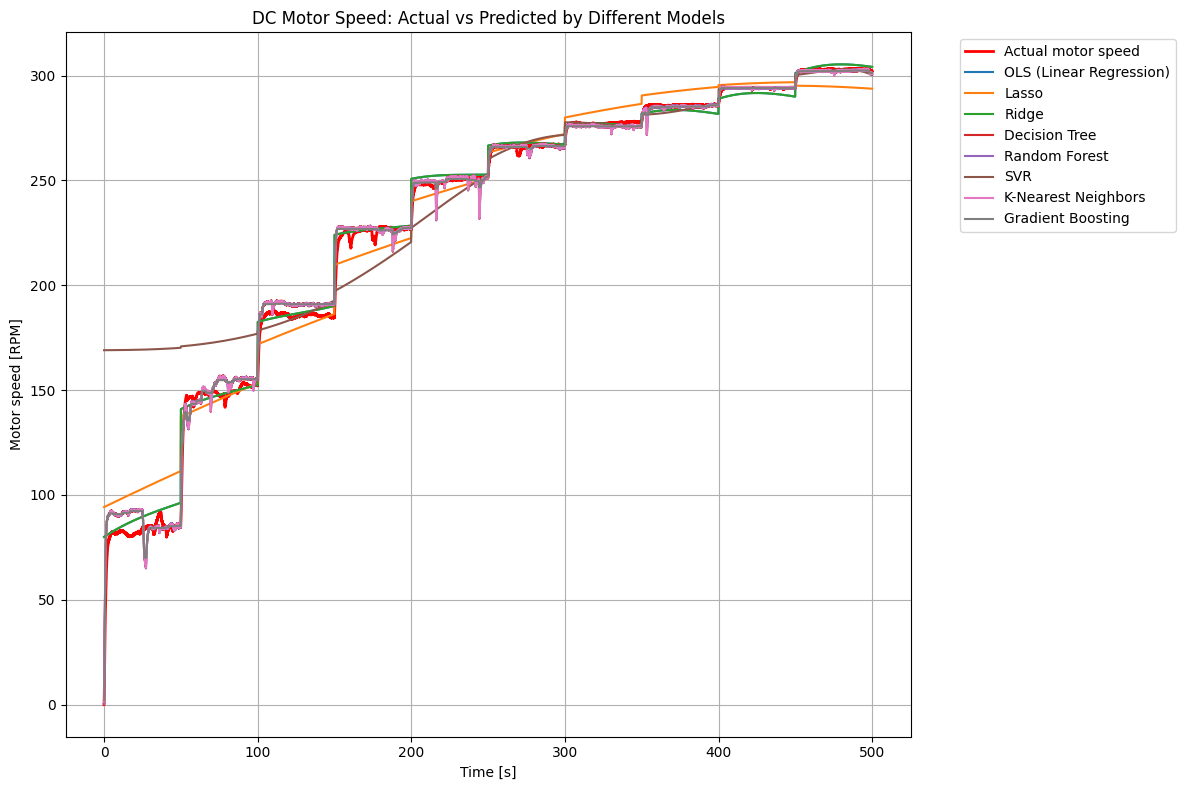

In [ ]:
# Load and prepare testing data
exp_data_ts = pd.read_csv('DC_Motor_experimental_data_testing.csv')
exp_data_ts.columns = ['time', 'voltage', 'speed']

# Extract features and target variables for testing data
t_ts = np.array(exp_data_ts["time"])
v_ts = np.array(exp_data_ts["voltage"])
theta_ts = np.array(exp_data_ts["speed"])

# Stack the input features for testing data
X_ts = np.column_stack((v_ts, t_ts))
X_ts_poly = poly.transform(X_ts)

# Evaluate and plot all models
plt.figure(figsize=(12, 8))
plt.plot(t_ts, theta_ts, label='Actual motor speed', color='red', linewidth=2)

for name, model in models.items():
    # Re-predict for actual test data
    theta_pred = model.predict(X_ts_poly)

    # Calculate and print evaluation metrics for the test set
    mse = mean_squared_error(theta_ts, theta_pred)
    mae = mean_absolute_error(theta_ts, theta_pred)
    r2 = r2_score(theta_ts, theta_pred)

    print(f"{name} Test Set Mean Squared Error (MSE): {mse}")
    print(f"{name} Test Set Mean Absolute Error (MAE): {mae}")
    print(f"{name} Test Set R^2 Score: {r2}\n")

    # Plot predictions
    plt.plot(t_ts, theta_pred, label=f'{name}')

# Final plot adjustments
plt.xlabel('Time [s]')
plt.ylabel('Motor speed [RPM]')
plt.title('DC Motor Speed: Actual vs Predicted by Different Models')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Print all metrics for the training set
print("\nEvaluation Metrics for the Training Set:\n")
for name, metric in metrics.items():
    print(f"{name}:")
    print(f" - Mean Squared Error (MSE): {metric['MSE']}")
    print(f" - Mean Absolute Error (MAE): {metric['MAE']}")
    print(f" - R^2 Score: {metric['R2']}\n")



Evaluation Metrics for the Training Set:

OLS (Linear Regression):
 - Mean Squared Error (MSE): 24.86013218476773
 - Mean Absolute Error (MAE): 3.275004887803526
 - R^2 Score: 0.9944676528186954

Lasso:
 - Mean Squared Error (MSE): 94.77286550110304
 - Mean Absolute Error (MAE): 7.692149332766467
 - R^2 Score: 0.9789093480508344

Ridge:
 - Mean Squared Error (MSE): 24.860132308222532
 - Mean Absolute Error (MAE): 3.2749692718336436
 - R^2 Score: 0.994467652791222

Decision Tree:
 - Mean Squared Error (MSE): 0.0
 - Mean Absolute Error (MAE): 0.0
 - R^2 Score: 1.0

Random Forest:
 - Mean Squared Error (MSE): 0.016173624752739202
 - Mean Absolute Error (MAE): 0.09241001457839677
 - R^2 Score: 0.999996400738876

SVR:
 - Mean Squared Error (MSE): 821.136787130388
 - Mean Absolute Error (MAE): 14.804791499101093
 - R^2 Score: 0.8172650991562397

K-Nearest Neighbors:
 - Mean Squared Error (MSE): 0.06568274105808125
 - Mean Absolute Error (MAE): 0.1871430278650641
 - R^2 Score: 0.999985383033